<a href="https://colab.research.google.com/github/Code-Blooded-Human/Image-Inpainting-using-Partial-Convolutions/blob/master/Image_Inpainting_Tirece_2_Submission_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!git clone https://github.com/Code-Blooded-Human/Image-Inpainting-using-Partial-Convolutions.git

Cloning into 'Image-Inpainting-using-Partial-Convolutions'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 38 (delta 6), reused 38 (delta 6), pack-reused 0
Unpacking objects: 100% (38/38), done.


In [8]:
%cd Image-Inpainting-using-Partial-Convolutions

/content/Image-Inpainting-using-Partial-Convolutions/Image-Inpainting-using-Partial-Convolutions


In [9]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import ImageGrid
from utils.DataGenerator import DataGenerator
from datasets.cifar10 import previewGeneratorData, cifar10, previewDataset
from models.PartialCNNSimple.PCNN import PCNN, dice_coef

In [10]:
(x_train, y_train), (x_test, y_test) = cifar10()
#previewDataset(x_train,y_train)

Loading CIFAR-10 dataset
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [11]:
trainGenerator = DataGenerator(x_train, x_train, shuffle=True)
testGenerator = DataGenerator(x_test, x_test, shuffle=False)

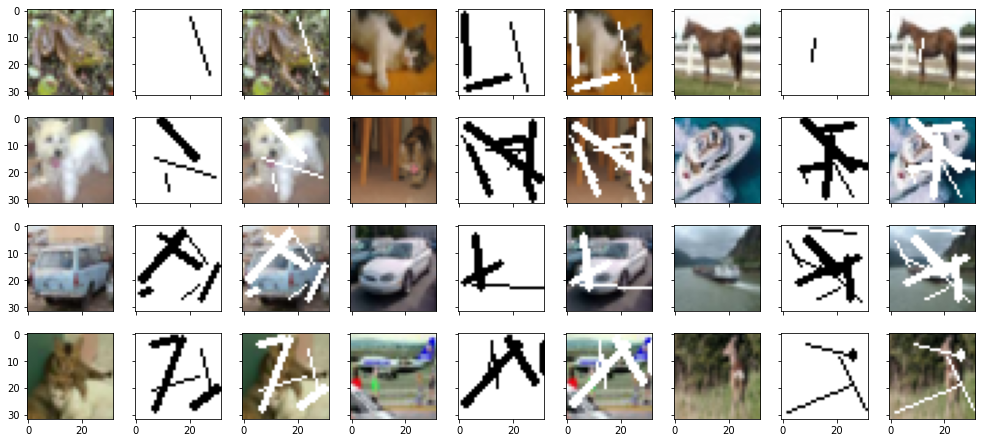

In [12]:
previewGeneratorData(trainGenerator)

In [13]:
keras.backend.clear_session()
model = PCNN().prepare_model()
model.summary()
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=[dice_coef])

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
encoder_input (InputLayer)      [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1 (PConv2D)                 [(None, 32, 32, 32), 1760        input_1[0][0]                    
                                                                 encoder_input[0][0]              
__________________________________________________________________________________________________
tf.nn.relu (TFOpLambda)         (None, 32, 32, 32)   0           conv1[0][0]                  

In [14]:
_ = model.fit(trainGenerator, validation_data=testGenerator, 
          epochs=30, 
          steps_per_epoch=len(trainGenerator), 
          validation_steps=len(testGenerator),
          use_multiprocessing=True)

Epoch 1/30
1562/1562 [==============================] - 87s 33ms/step - loss: 0.1398 - dice_coef: 0.5086 - val_loss: 0.0764 - val_dice_coef: 0.5676
Epoch 2/30
1562/1562 [==============================] - 52s 33ms/step - loss: 0.0715 - dice_coef: 0.5723 - val_loss: 0.0638 - val_dice_coef: 0.5828
Epoch 3/30
1562/1562 [==============================] - 51s 33ms/step - loss: 0.0519 - dice_coef: 0.5873 - val_loss: 0.0394 - val_dice_coef: 0.5971
Epoch 4/30
1562/1562 [==============================] - 51s 33ms/step - loss: 0.0383 - dice_coef: 0.5926 - val_loss: 0.0364 - val_dice_coef: 0.5966
Epoch 5/30
1562/1562 [==============================] - 51s 33ms/step - loss: 0.0359 - dice_coef: 0.5947 - val_loss: 0.0348 - val_dice_coef: 0.5976
Epoch 6/30
1562/1562 [==============================] - 51s 33ms/step - loss: 0.0345 - dice_coef: 0.5961 - val_loss: 0.0335 - val_dice_coef: 0.5993
Epoch 7/30
1562/1562 [==============================] - 52s 33ms/step - loss: 0.0333 - dice_coef: 0.5966 - val_l

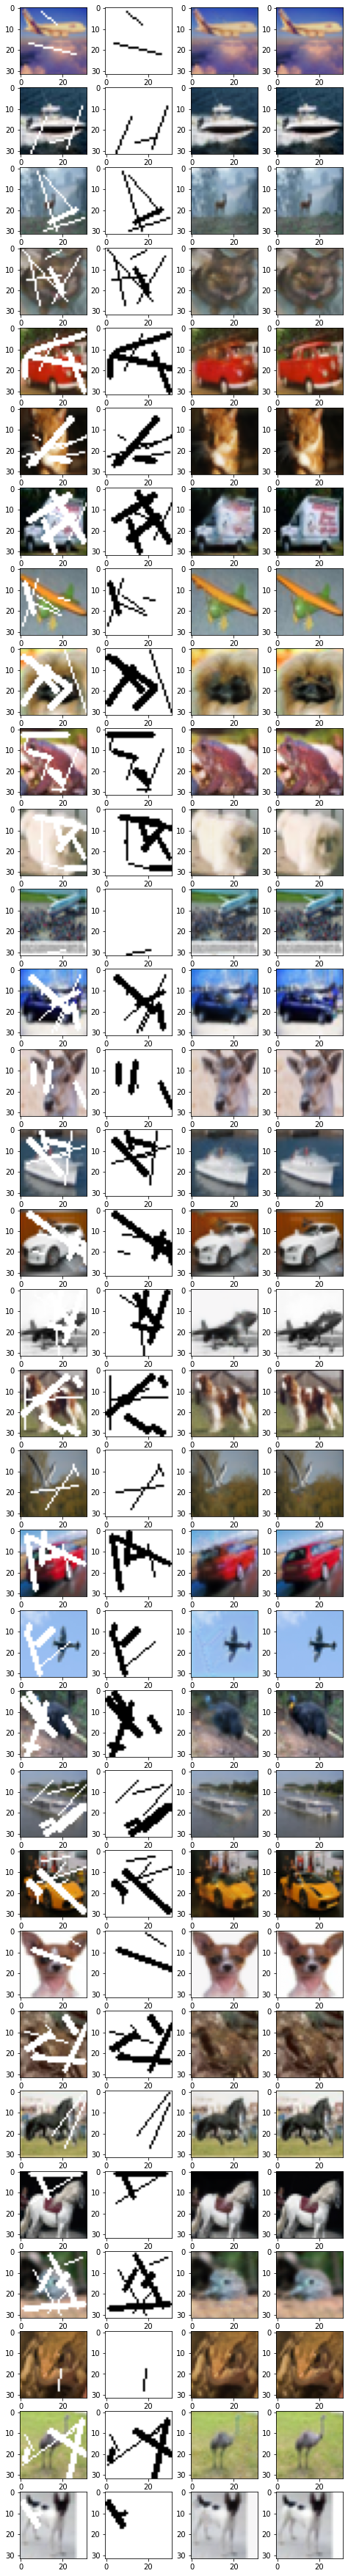

In [16]:
testCases = 32

[masked_images, masks], sample_labels = testGenerator[54]
fig, axs = plt.subplots(nrows=testCases, ncols=4, figsize=(8, 2*testCases))
for i in range(testCases):
  inputs = [masked_images[i].reshape((1,)+masked_images[i].shape), masks[i].reshape((1,)+masks[i].shape)]
  impainted_image = model.predict(inputs)
  axs[i][0].imshow(masked_images[i])
  axs[i][1].imshow(masks[i])
  axs[i][2].imshow(impainted_image.reshape(impainted_image.shape[1:]))
  axs[i][3].imshow(sample_labels[i])
  
plt.show()
# Image With Mask || Mask || Generated Image || Original Image